In [36]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pwd

'/home/wsuser/work'

In [4]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_11e2c12b890445dc88de6b1cc18e27d0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8LroDiIvacCkB21uoNYN0Up03JuE0oaM7x8y7badPPrC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_11e2c12b890445dc88de6b1cc18e27d0.get_object(Bucket='nftsalesanalytics-donotdelete-pr-hapwycfiwmwvwu',Key='NFT_Sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


In [5]:
df.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    8
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          1
AverageUSD_cum                  1
Sales_USD                       1
Number_of_Sales                 1
Active_Market_Wallets           9
Primary_Sales                   1
dtype: int64

In [6]:
df['Active_Market_Wallets_cumsum'] = df['Active_Market_Wallets_cumsum'].fillna(df['Active_Market_Wallets_cumsum'].mean())
df['Active_Market_Wallets'] = df['Active_Market_Wallets'].fillna(df['Active_Market_Wallets'].mean())
df = df.fillna(0)

In [7]:
df.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    0
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          0
AverageUSD_cum                  0
Sales_USD                       0
Number_of_Sales                 0
Active_Market_Wallets           0
Primary_Sales                   0
dtype: int64

In [8]:
df.head(10)

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,0.0,0.00,0.00,0.0,502.875391,0.0
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.000000,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.000000,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.000000,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.000000,0.0
5,2017-06-27,5296.23,100,44.0,0,33.0,52.96,2092.91,33.0,10.000000,0.0
6,2017-06-28,6543.49,115,46.0,0,15.0,56.90,1247.26,15.0,2.000000,0.0
7,2017-06-29,8729.21,153,49.0,0,38.0,57.05,2185.72,38.0,3.000000,0.0
8,2017-06-30,10437.36,174,53.0,0,21.0,59.98,1708.15,21.0,4.000000,0.0
9,2017-07-01,13578.16,184,55.0,0,10.0,73.79,3140.80,10.0,2.000000,0.0


In [9]:
df.tail(10)

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
1596,2021-11-03,9.812304e+09,10665664,803665.000000,6387576,1443.0,919.99,4.309933e+07,23465.0,3308.000000,22022.0
1597,2021-11-04,9.859177e+09,10678772,803092.000000,6392713,7971.0,923.25,4.687265e+07,13108.0,-573.000000,5137.0
1598,2021-11-05,9.890102e+09,10691247,155847.829161,6398169,7019.0,925.07,3.092464e+07,12475.0,502.875391,5456.0
1599,2021-11-06,9.948558e+09,10809535,155847.829161,6472314,44143.0,920.35,5.845599e+07,118288.0,502.875391,74145.0
1600,2021-11-07,1.001097e+10,10853882,155847.829161,6496920,19741.0,922.34,6.240829e+07,44347.0,502.875391,24606.0
1601,2021-11-08,1.008803e+10,10913146,155847.829161,6541355,14829.0,924.39,7.706698e+07,59264.0,502.875391,44435.0
1602,2021-11-09,1.014001e+10,10964025,155847.829161,6573511,18723.0,924.84,5.197508e+07,50879.0,502.875391,32156.0
1603,2021-11-10,1.019902e+10,11008847,155847.829161,6601205,17128.0,926.44,5.901034e+07,44822.0,502.875391,27694.0
1604,2021-11-11,1.023456e+10,11022782,155847.829161,6609013,6127.0,928.49,3.554317e+07,13935.0,502.875391,7808.0
1605,2021-11-12,1.022836e+10,11020587,155847.829161,6607842,-1024.0,928.11,-6.196720e+06,-2195.0,502.875391,-1171.0


In [10]:
df1=df.iloc[:,[9,10,5,6]]
df1

,Active_Market_Wallets,Primary_Sales,Secondary_Sales_cumsum,AverageUSD_cum
0,502.875391,0.0,0.0,0.00
1,8.000000,0.0,19.0,53.70
2,13.000000,0.0,21.0,56.53
3,7.000000,0.0,13.0,52.43
4,6.000000,0.0,14.0,47.81
...,...,...,...,...
1601,502.875391,44435.0,14829.0,924.39
1602,502.875391,32156.0,18723.0,924.84
1603,502.875391,27694.0,17128.0,926.44
1604,502.875391,7808.0,6127.0,928.49


In [11]:
x=df.drop(['AverageUSD_cum','Date','Sales_USD_cumsum'],axis=1)
y=df['AverageUSD_cum']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [13]:
x_train.shape,x_test.shape

((1076, 8), (530, 8))

In [30]:
pip install category_encoders

     |████████████████████████████████| 72 kB 1.7 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Active_Market_Wallets','Primary_Sales','Secondary_Sales_cumsum'])
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)

In [32]:
x_train.head()

,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
829,3246910,123838.0,2325117,1,74120.41,2563.0,1,1
126,958,141.0,0,2,268.92,7.0,2,2
916,3762801,135962.0,2570905,3,64775.42,5509.0,3,3
1187,4886901,177483.0,3127103,4,429816.64,2323.0,4,4
355,1339986,78339.0,885417,5,36981.38,2903.0,5,5


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import *

In [34]:
x_train,y_train = make_regression(n_features=4, n_informative=2, random_state=0,shuffle=False)
model = RandomForestRegressor(max_depth=2,random_state=0)

In [35]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [36]:
val1=int(model.predict([[1,1,1,1]]))
val2=int(model.predict([[0,1,0,1]]))
val3=int(model.predict([[0,1,1,1]]))
print(val1,val2,val3)

45 34 34


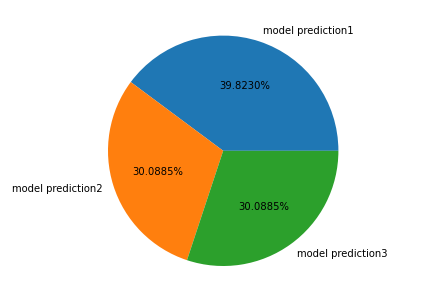

In [37]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['model prediction1','model prediction2','model prediction3']
s=[val1,val2,val3]
ax.pie(s,labels=l,autopct='%1.4f%%')
plt.show()

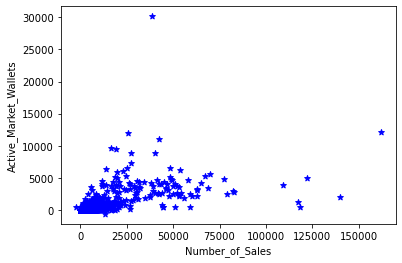

In [27]:
plt.xlabel('Number_of_Sales')
plt.ylabel('Active_Market_Wallets')
plt.scatter(df.Number_of_Sales,df.Active_Market_Wallets,color='blue',marker='*')

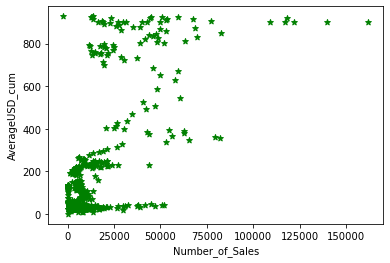

In [28]:
plt.xlabel('Number_of_Sales')
plt.ylabel('AverageUSD_cum')
plt.scatter(df.Number_of_Sales,df.AverageUSD_cum,color='green',marker='*')

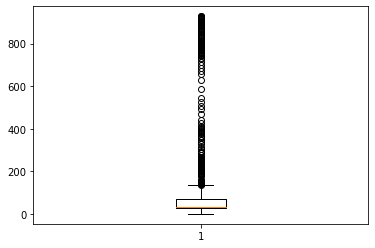

In [29]:
plt.figure(1)
plt.boxplot([df['AverageUSD_cum']])
plt.show()

array([[<AxesSubplot:title={'center':'AverageUSD_cum'}>]], dtype=object)

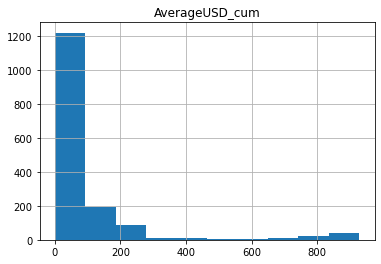

In [30]:
df.hist('AverageUSD_cum')

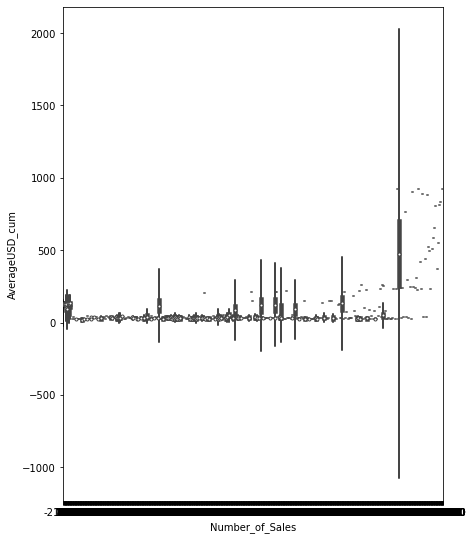

In [34]:
plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
sns.violinplot(x='Number_of_Sales',y='AverageUSD_cum',data=df)
plt.show()

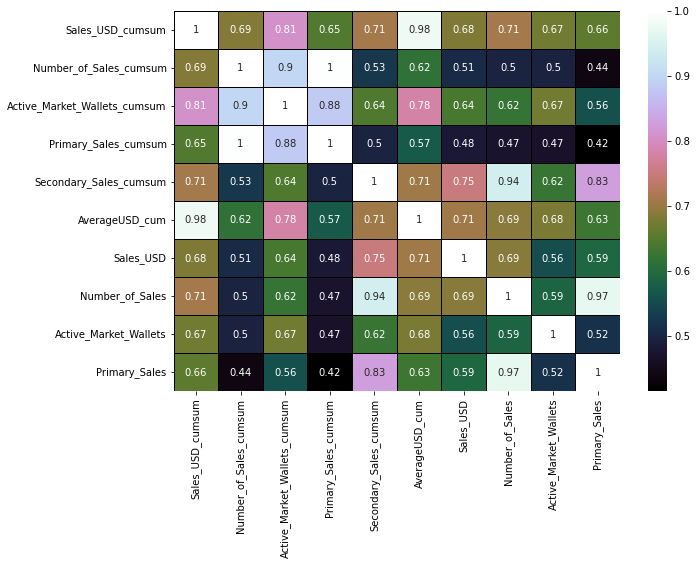

In [35]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k')

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

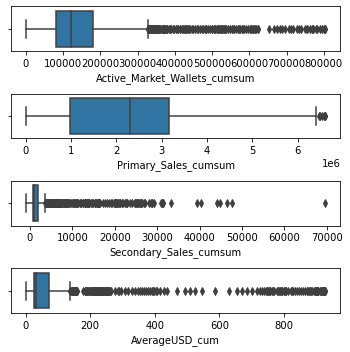

In [36]:
import seaborn as sns
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['Active_Market_Wallets_cumsum'], ax = axs[0])
plt2 = sns.boxplot(df['Primary_Sales_cumsum'], ax = axs[1])
plt3 = sns.boxplot(df['Secondary_Sales_cumsum'], ax = axs[2])
plt4 = sns.boxplot(df['AverageUSD_cum'], ax = axs[3])
plt.tight_layout()

In [19]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(x, y)
#y_pred = model.predict(x_test)
#confidence = model.score(x_test, y_test)
#print(confidence)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_pred)
confidence = regressor.score(x_train,y_pred)
print("Acuuracy of the model:  ",confidence)

[ 9.75059413e+00  1.00011849e+02  2.23417494e+02  4.73576150e+01
  5.58479406e+01  4.49104126e+02  1.67388753e+02  8.95221066e+01
  2.28021628e+01  7.47386245e+01  1.77903831e+01  6.01155225e+01
 -3.89537762e+01  7.08048304e+02  5.10592237e+00  4.72816676e+01
  4.72500893e+01  1.42478315e+02  5.74980980e+01  6.50844993e+01
  1.18597122e+02 -4.13875939e+00  5.02756467e+02  9.94889227e+01
  4.72745354e+01  1.57446975e+01  3.06729208e+00 -5.00492606e+01
  6.96808290e+01  8.25706831e+02  4.72870879e+01  5.41160037e+01
  1.20190712e+02  1.70164360e+02  1.11819892e+02  3.63004754e+00
  1.58026471e+01  8.78187483e+01  1.12488483e+02  1.97971170e+02
  8.79490448e+01  2.01081920e+01 -5.84222349e-01  4.71937264e+01
  5.95732497e+01  4.72791282e+01  5.14813020e+01  4.73162024e+01
 -4.00089260e+01  1.08928416e+02  3.63703211e+01  1.05639185e+02
  6.86988254e+02  5.47968998e+01  6.84918518e+01  2.01098924e+02
  9.16249776e+01  6.31574120e+01 -4.08807963e+00 -4.94909505e+01
  1.16069905e+02  4.73063

In [21]:
X = df.drop(['AverageUSD_cum','Date'],axis=1).values
X[0:5]

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,  502.87539136,
           0.        ],
       [1020.3       ,   19.        ,    8.        ,    0.        ,
          19.        , 1020.3       ,   19.        ,    8.        ,
           0.        ],
       [2261.14      ,   40.        ,   21.        ,    0.        ,
          21.        , 1240.84      ,   21.        ,   13.        ,
           0.        ],
       [2778.69      ,   53.        ,   28.        ,    0.        ,
          13.        ,  517.55      ,   13.        ,    7.        ,
           0.        ],
       [3203.32      ,   67.        ,   34.        ,    0.        ,
          14.        ,  424.63      ,   14.        ,    6.        ,
           0.        ]])

In [22]:
Y = df['AverageUSD_cum'].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [24]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [25]:
Y_predict = regressor.predict(X_test)
Y_predict[0:20]

array([ 39.29516599,  20.18992732,  31.68471214,  48.0839771 ,
        25.43790456, 646.34956689, 118.75525   ,  42.56130434,
        69.46549542,  35.33582055, 121.57233165,  40.50819454,
        29.92785325,  32.59788236, 682.73126896,  34.1982961 ,
       911.37671386,  67.99818673,  31.15291224,  60.7089928 ])

In [26]:
from sklearn.metrics import r2_score
r2_score(Y_predict, Y_test)

0.9675095771486381

In [27]:
score = regressor.score(X_test, Y_test) 
score

0.9701773034691825

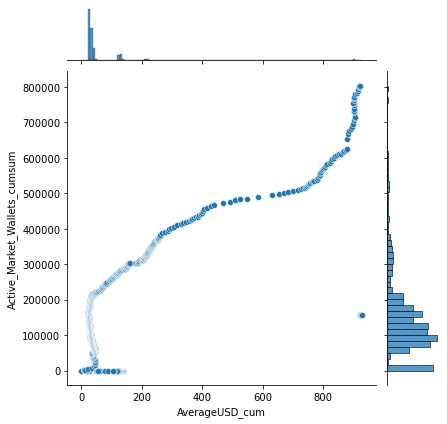

In [29]:
import seaborn as sns
sns.jointplot(x ='AverageUSD_cum',y='Active_Market_Wallets_cumsum', data = df)


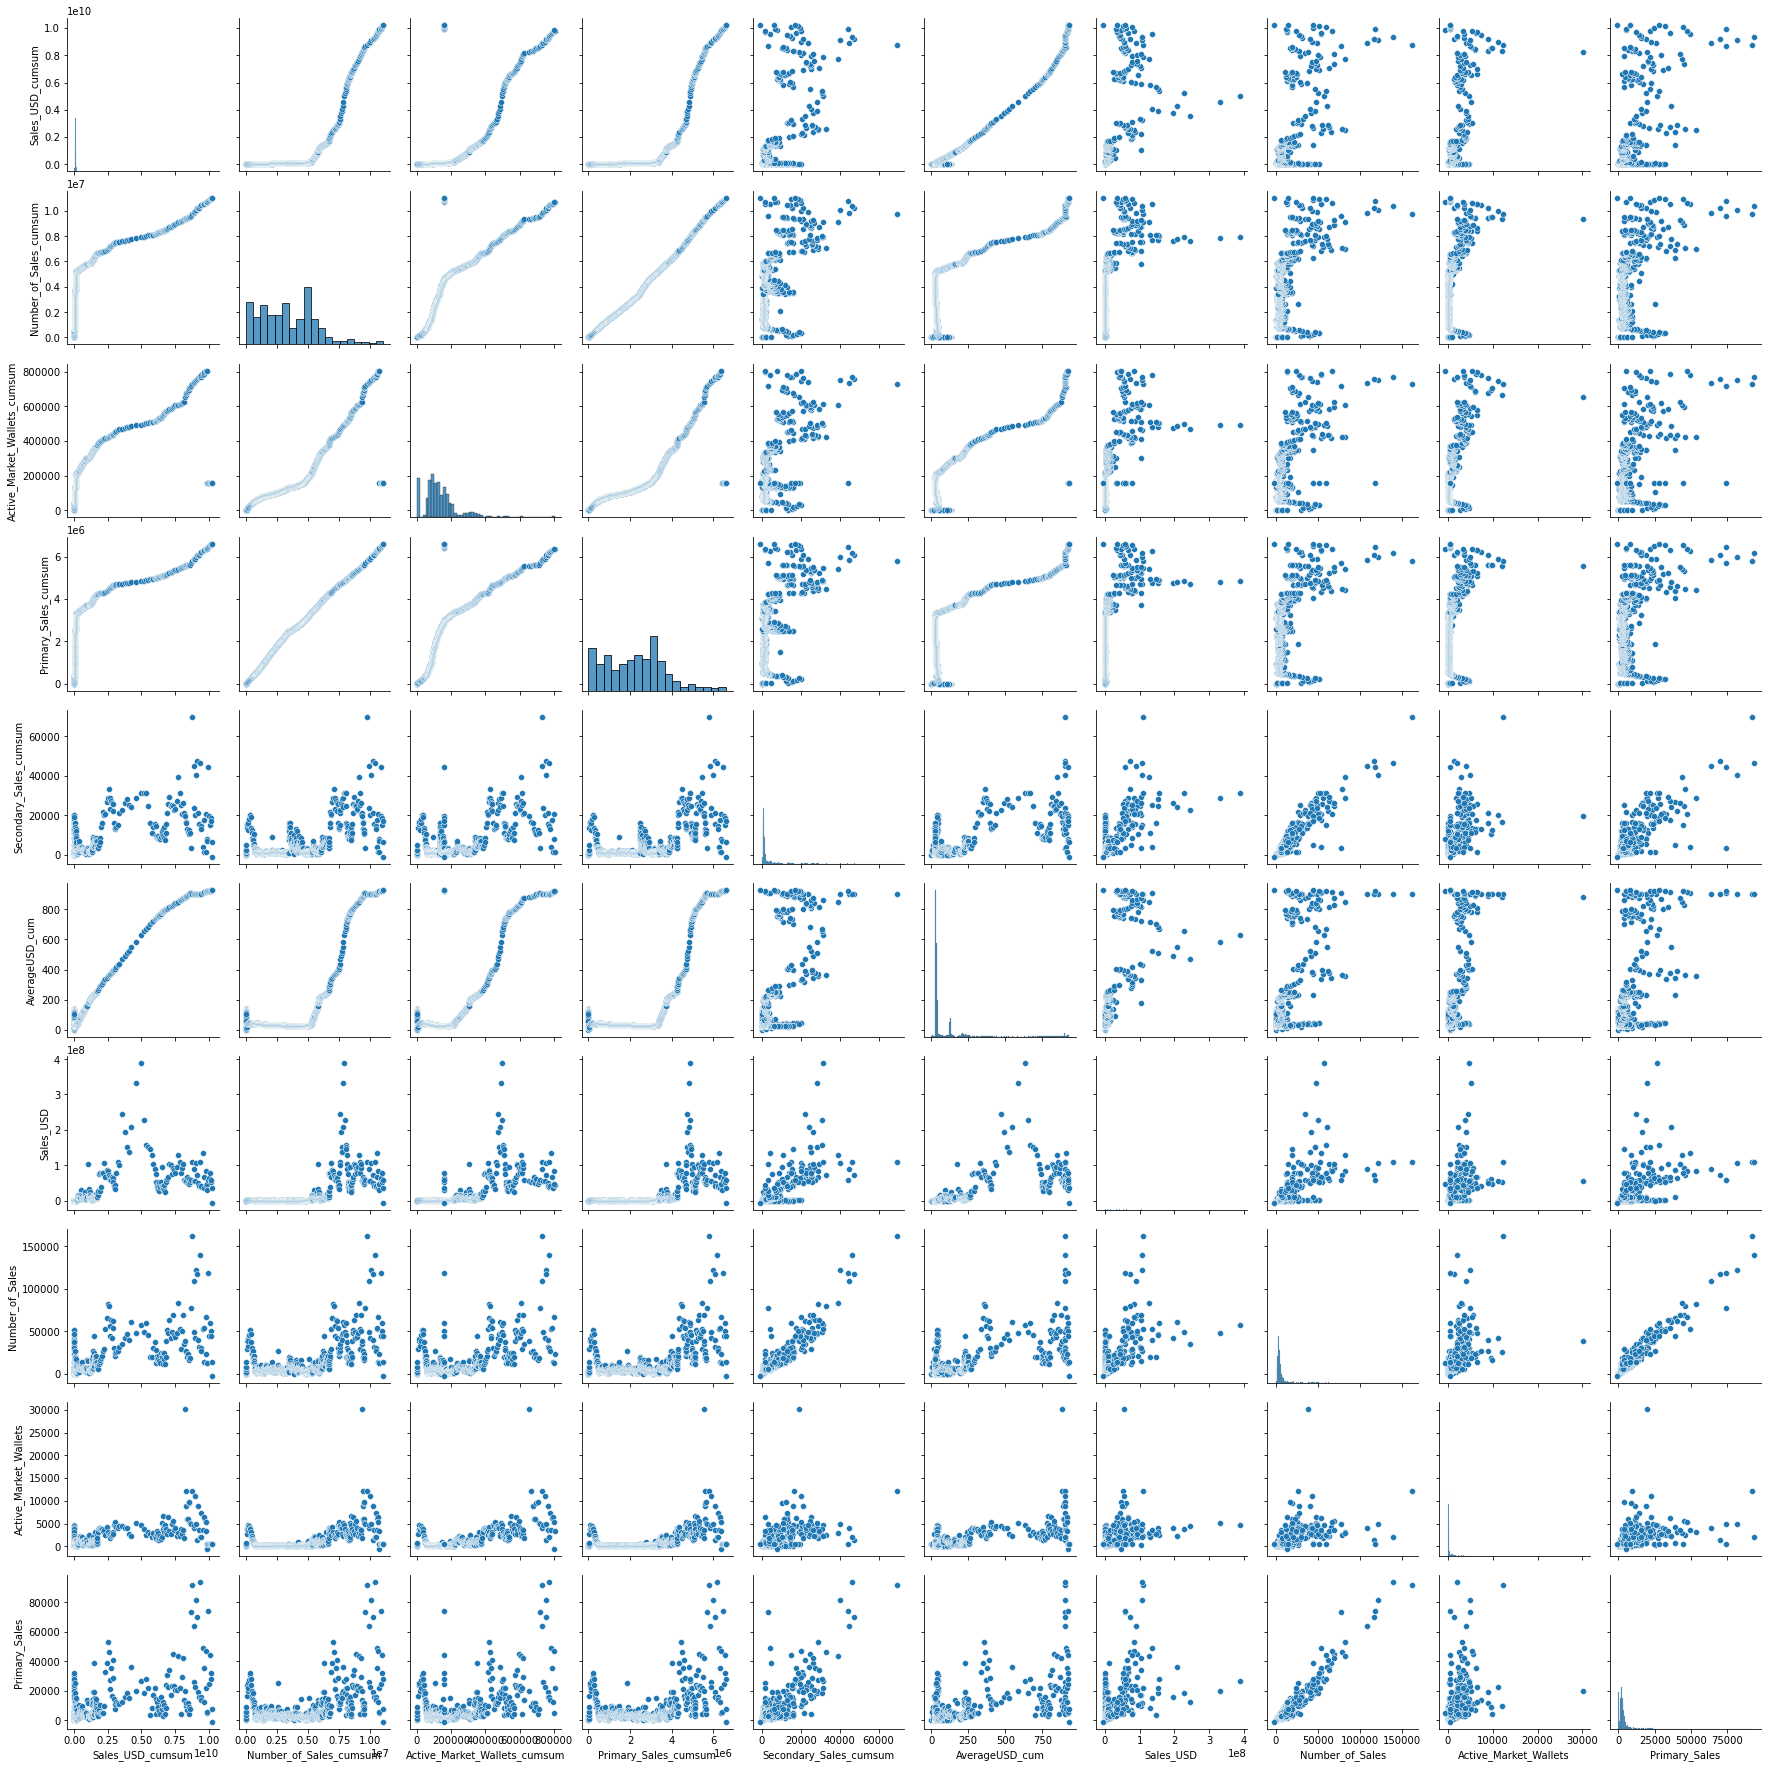

In [31]:
sns.pairplot(df)